In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading data

In [4]:
df=pd.read_csv("insurance.csv")

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


# Feature Engineering

In [18]:
df.drop(['male'],axis=1)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [19]:
Male=pd.get_dummies(df['sex'],drop_first=True)
df=pd.concat([df,Male],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,expenses,male,male,male,male
0,19,female,27.9,0,yes,southwest,16884.92,0,0,0,0
1,18,male,33.8,1,no,southeast,1725.55,1,1,1,1
2,28,male,33.0,3,no,southeast,4449.46,1,1,1,1
3,33,male,22.7,0,no,northwest,21984.47,1,1,1,1
4,32,male,28.9,0,no,northwest,3866.86,1,1,1,1


In [20]:
df.drop(['male'],axis=1)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [21]:
df.head()

,age,sex,bmi,children,smoker,region,expenses,male,male,male,male
0,19,female,27.9,0,yes,southwest,16884.92,0,0,0,0
1,18,male,33.8,1,no,southeast,1725.55,1,1,1,1
2,28,male,33.0,3,no,southeast,4449.46,1,1,1,1
3,33,male,22.7,0,no,northwest,21984.47,1,1,1,1
4,32,male,28.9,0,no,northwest,3866.86,1,1,1,1


In [44]:
Smoker=pd.get_dummies(df['smoker'],drop_first=True)
df=pd.concat([df,Smoker],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,expenses,male,male,male,male,smoker,smoker,smoker_yes
0,19,female,27.9,0,yes,southwest,16884.92,0,0,0,0,1,1,1
1,18,male,33.8,1,no,southeast,1725.55,1,1,1,1,0,0,0
2,28,male,33.0,3,no,southeast,4449.46,1,1,1,1,0,0,0
3,33,male,22.7,0,no,northwest,21984.47,1,1,1,1,0,0,0
4,32,male,28.9,0,no,northwest,3866.86,1,1,1,1,0,0,0


In [43]:
df=df.rename(columns={"yes":"Smokers"})
df.head()

,age,sex,bmi,children,smoker,region,expenses,male,male,male,male,smoker
0,19,female,27.9,0,yes,southwest,16884.92,0,0,0,0,1
1,18,male,33.8,1,no,southeast,1725.55,1,1,1,1,0
2,28,male,33.0,3,no,southeast,4449.46,1,1,1,1,0
3,33,male,22.7,0,no,northwest,21984.47,1,1,1,1,0
4,32,male,28.9,0,no,northwest,3866.86,1,1,1,1,0


In [27]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [46]:
Region=pd.get_dummies(df['region'],drop_first=True)
df=pd.concat([df,Region],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,expenses,male,male,male,male,smoker,smoker,smoker_yes,northwest,southeast,southwest
0,19,female,27.9,0,yes,southwest,16884.92,0,0,0,0,1,1,1,0,0,1
1,18,male,33.8,1,no,southeast,1725.55,1,1,1,1,0,0,0,0,1,0
2,28,male,33.0,3,no,southeast,4449.46,1,1,1,1,0,0,0,0,1,0
3,33,male,22.7,0,no,northwest,21984.47,1,1,1,1,0,0,0,1,0,0
4,32,male,28.9,0,no,northwest,3866.86,1,1,1,1,0,0,0,1,0,0


# Exploratory Analysis

In [30]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

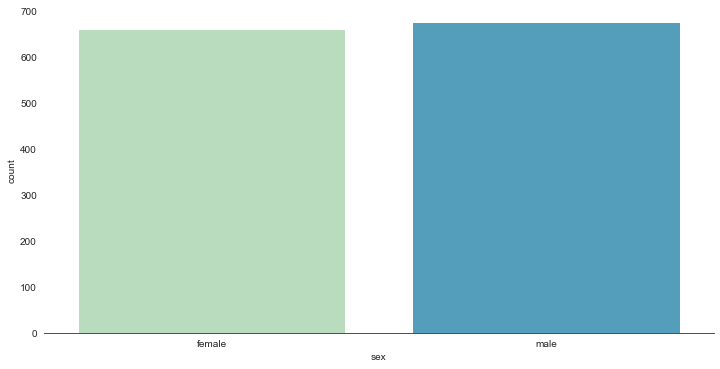

In [33]:
plt.figure(figsize=(12,6))
sns.set_style("white")
sns.countplot(x="sex",data=df,palette="GnBu")
sns.despine(left=True)

# Relationship of smoking to charges

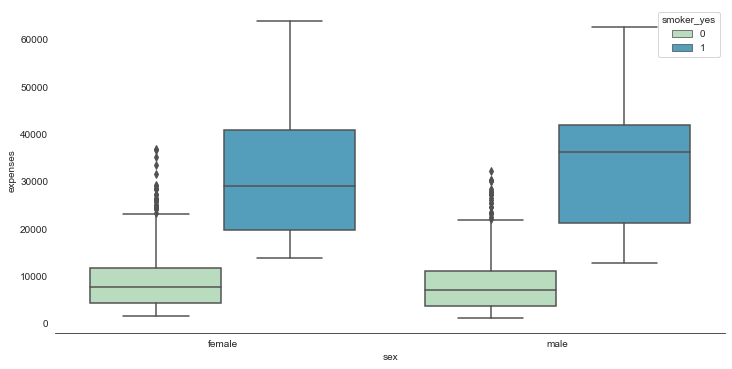

In [45]:
plt.figure(figsize=(12,6))
sns.set_style("white")
sns.boxplot(x="sex",y="expenses",data=df,palette="GnBu",hue="smoker_yes")
sns.despine(left=True)

<AxesSubplot:xlabel='age', ylabel='expenses'>

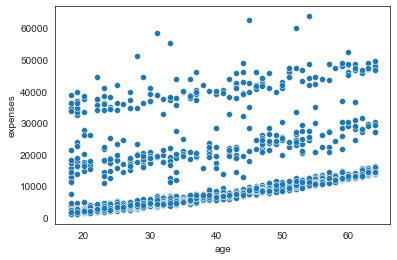

In [48]:
sns.scatterplot(x="age",y="expenses",data=df)

<AxesSubplot:xlabel='age', ylabel='expenses'>

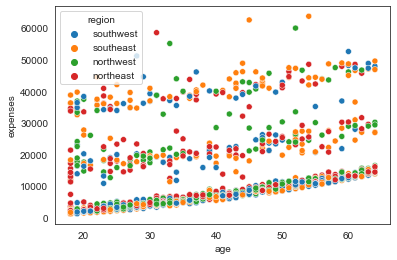

In [49]:
sns.scatterplot(x="age",y="expenses",data=df,hue="region")

<AxesSubplot:xlabel='age', ylabel='expenses'>

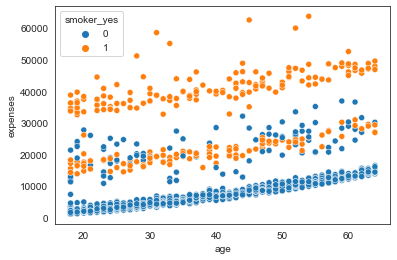

In [50]:
sns.scatterplot(x="age",y="expenses",data=df,hue="smoker_yes")

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

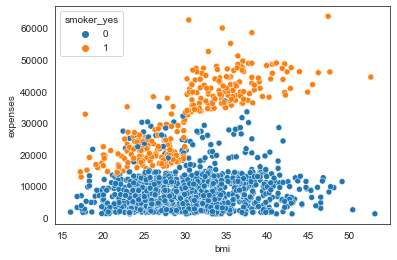

In [51]:
sns.scatterplot(x="bmi",y="expenses",data=df,hue="smoker_yes")

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

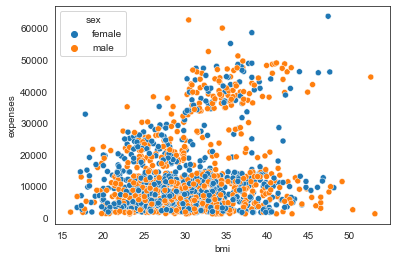

In [52]:
sns.scatterplot(x="bmi",y="expenses",data=df,hue="sex")

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

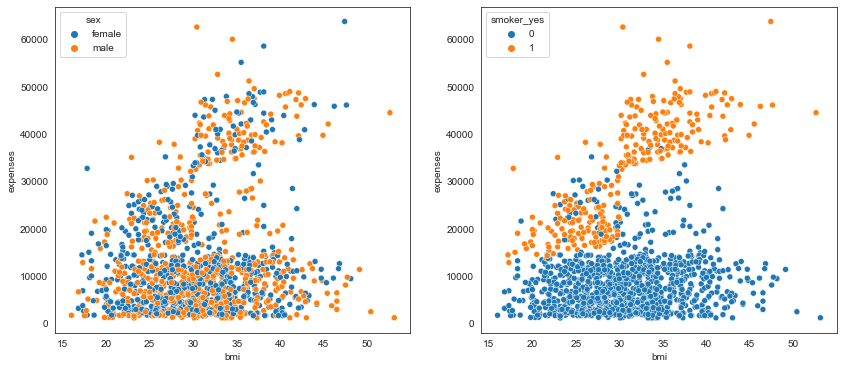

In [54]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,6))
sns.scatterplot(x="bmi",y="expenses",data=df,hue="sex",ax=ax[0])
sns.scatterplot(x="bmi",y="expenses",data=df,hue="smoker_yes",ax=ax[1])


In [58]:
df.drop(["sex","smoker","region"],axis=1)

KeyError: "['sex' 'smoker' 'region'] not found in axis"

In [59]:
df.head()

,age,bmi,children,expenses,male,male,male,male,smoker_yes,northwest,southeast,southwest
0,19,27.9,0,16884.92,0,0,0,0,1,0,0,1
1,18,33.8,1,1725.55,1,1,1,1,0,0,1,0
2,28,33.0,3,4449.46,1,1,1,1,0,0,1,0
3,33,22.7,0,21984.47,1,1,1,1,0,1,0,0
4,32,28.9,0,3866.86,1,1,1,1,0,1,0,0


<AxesSubplot:>

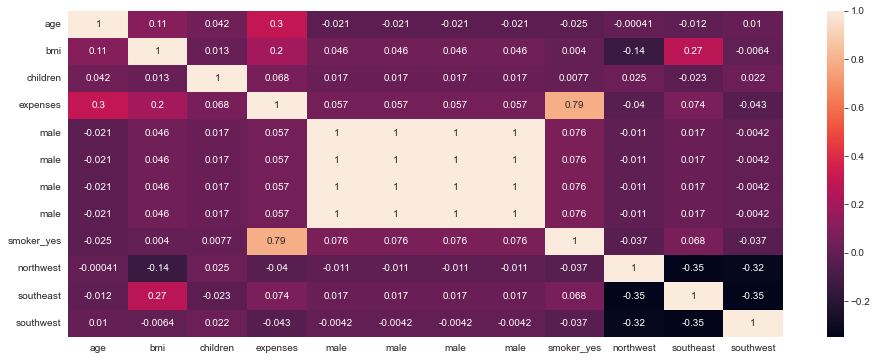

In [61]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True)

In [62]:
df.corr()

,age,bmi,children,expenses,male,male,male,male,smoker_yes,northwest,southeast,southwest
age,1.000000,0.109341,0.042469,0.299008,-0.020856,-0.020856,-0.020856,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109341,1.000000,0.012645,0.198576,0.046380,0.046380,0.046380,0.046380,0.003968,-0.135992,0.270144,-0.006398
children,0.042469,0.012645,1.000000,0.067998,0.017163,0.017163,0.017163,0.017163,0.007673,0.024806,-0.023066,0.021914
expenses,0.299008,0.198576,0.067998,1.000000,0.057292,0.057292,0.057292,0.057292,0.787251,-0.039905,0.073982,-0.043210
male,-0.020856,0.046380,0.017163,0.057292,1.000000,1.000000,1.000000,1.000000,0.076185,-0.011156,0.017117,-0.004184
male,-0.020856,0.046380,0.017163,0.057292,1.000000,1.000000,1.000000,1.000000,0.076185,-0.011156,0.017117,-0.004184
male,-0.020856,0.046380,0.017163,0.057292,1.000000,1.000000,1.000000,1.000000,0.076185,-0.011156,0.017117,-0.004184
male,-0.020856,0.046380,0.017163,0.057292,1.000000,1.000000,1.000000,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003968,0.007673,0.787251,0.076185,0.076185,0.076185,0.076185,1.000000,-0.036945,0.068498,-0.036945
northwest,-0.000407,-0.135992,0.024806,-0.039905,-0.011156,-0.011156,-0.011156,-0.011156,-0.036945,1.000000,-0.346265,-0.320829


# Splitting data

In [63]:
x=df.drop("expenses",axis=1)
y=df["expenses"]

In [64]:
x.head()

,age,bmi,children,male,male,male,male,smoker_yes,northwest,southeast,southwest
0,19,27.9,0,0,0,0,0,1,0,0,1
1,18,33.8,1,1,1,1,1,0,0,1,0
2,28,33.0,3,1,1,1,1,0,0,1,0
3,33,22.7,0,1,1,1,1,0,1,0,0
4,32,28.9,0,1,1,1,1,0,1,0,0


In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [67]:
x_train.shape

(802, 11)

In [68]:
x_test.shape

(536, 11)

# Scaling the data

In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [70]:
scaled_x_train=scaler.fit_transform(x_train)


In [82]:
scaled_x_test=scaler.transform(x_test)

# Support Vector Regression Model

In [83]:
from sklearn.svm import SVR

regressor=SVR()
regressor.fit(scaled_x_train,y_train)

SVR()

In [84]:
predict=regressor.predict(scaled_x_test)

In [85]:
predict.shape

(536,)

In [86]:
y_test.shape

(536,)

In [87]:
predict[:10]

array([9388.71941031, 9345.92230156, 9388.70083421, 9378.7787981 ,
       9382.5239233 , 9350.41647489, 9348.9138377 , 9327.96400541,
       9406.44813378, 9340.44459616])

In [88]:
y_test[:10]

928     13470.80
21       4149.74
532     12925.89
1232    12479.71
1101    11253.42
863      5458.05
15       1837.24
1163     2200.83
607     25678.78
816      2842.76
Name: expenses, dtype: float64